In [2]:
import sys
import os

from data_loader import data_loader

sys.path.append('../src')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 导入新模块
from product_analyzer import product_analyzer
from recommender import recommender
from config import PROCESSED_DATA_PATH

print("===  商品分析与推荐策略 ===")
print("开始商品深度洞察和推荐算法开发...")

=== DAY 4: 商品分析与推荐策略 ===
开始商品深度洞察和推荐算法开发...


In [3]:
print("步骤1: 加载数据")
df = pd.read_csv(PROCESSED_DATA_PATH, parse_dates=['datetime'])
df['date'] = pd.to_datetime(df['date'])

print(f"数据加载完成: {len(df):,} 条记录")
print(f"商品数量: {df['item_id'].nunique():,}")
print(f"类目数量: {df['category_id'].nunique():,}")

步骤1: 加载数据
数据加载完成: 499,997 条记录
商品数量: 295,252
类目数量: 5,715


In [4]:
print("步骤2: 商品热度分析")

# 分析商品热度
product_stats = product_analyzer.analyze_product_popularity(df)

# 分析类目表现
category_stats = product_analyzer.analyze_category_performance(df, product_stats)

print("✅ 商品热度分析完成")

步骤2: 商品热度分析
===商品热度分析===
总商品数:295,252
有购买行为的商品:9,500

===商品类目分析===
总类目数:5,715
TOP5热销类目
1.类目4756105:24,158.0次行为
2.类目4145813:17,205.0次行为
3.类目2355072:16,863.0次行为
4.类目3607361:15,686.0次行为
5.类目982926:15,352.0次行为
✅ 商品热度分析完成


步骤3: 商品关联分析

===商品关联规则分析===
未找到强关联规则，尝试降低min_suporrt参数
正在生成商品分析图表...
✅ 商品分析图表已保存至: D:\新建文件夹\电商用户行为分析\reports\figures\product_analysis.png


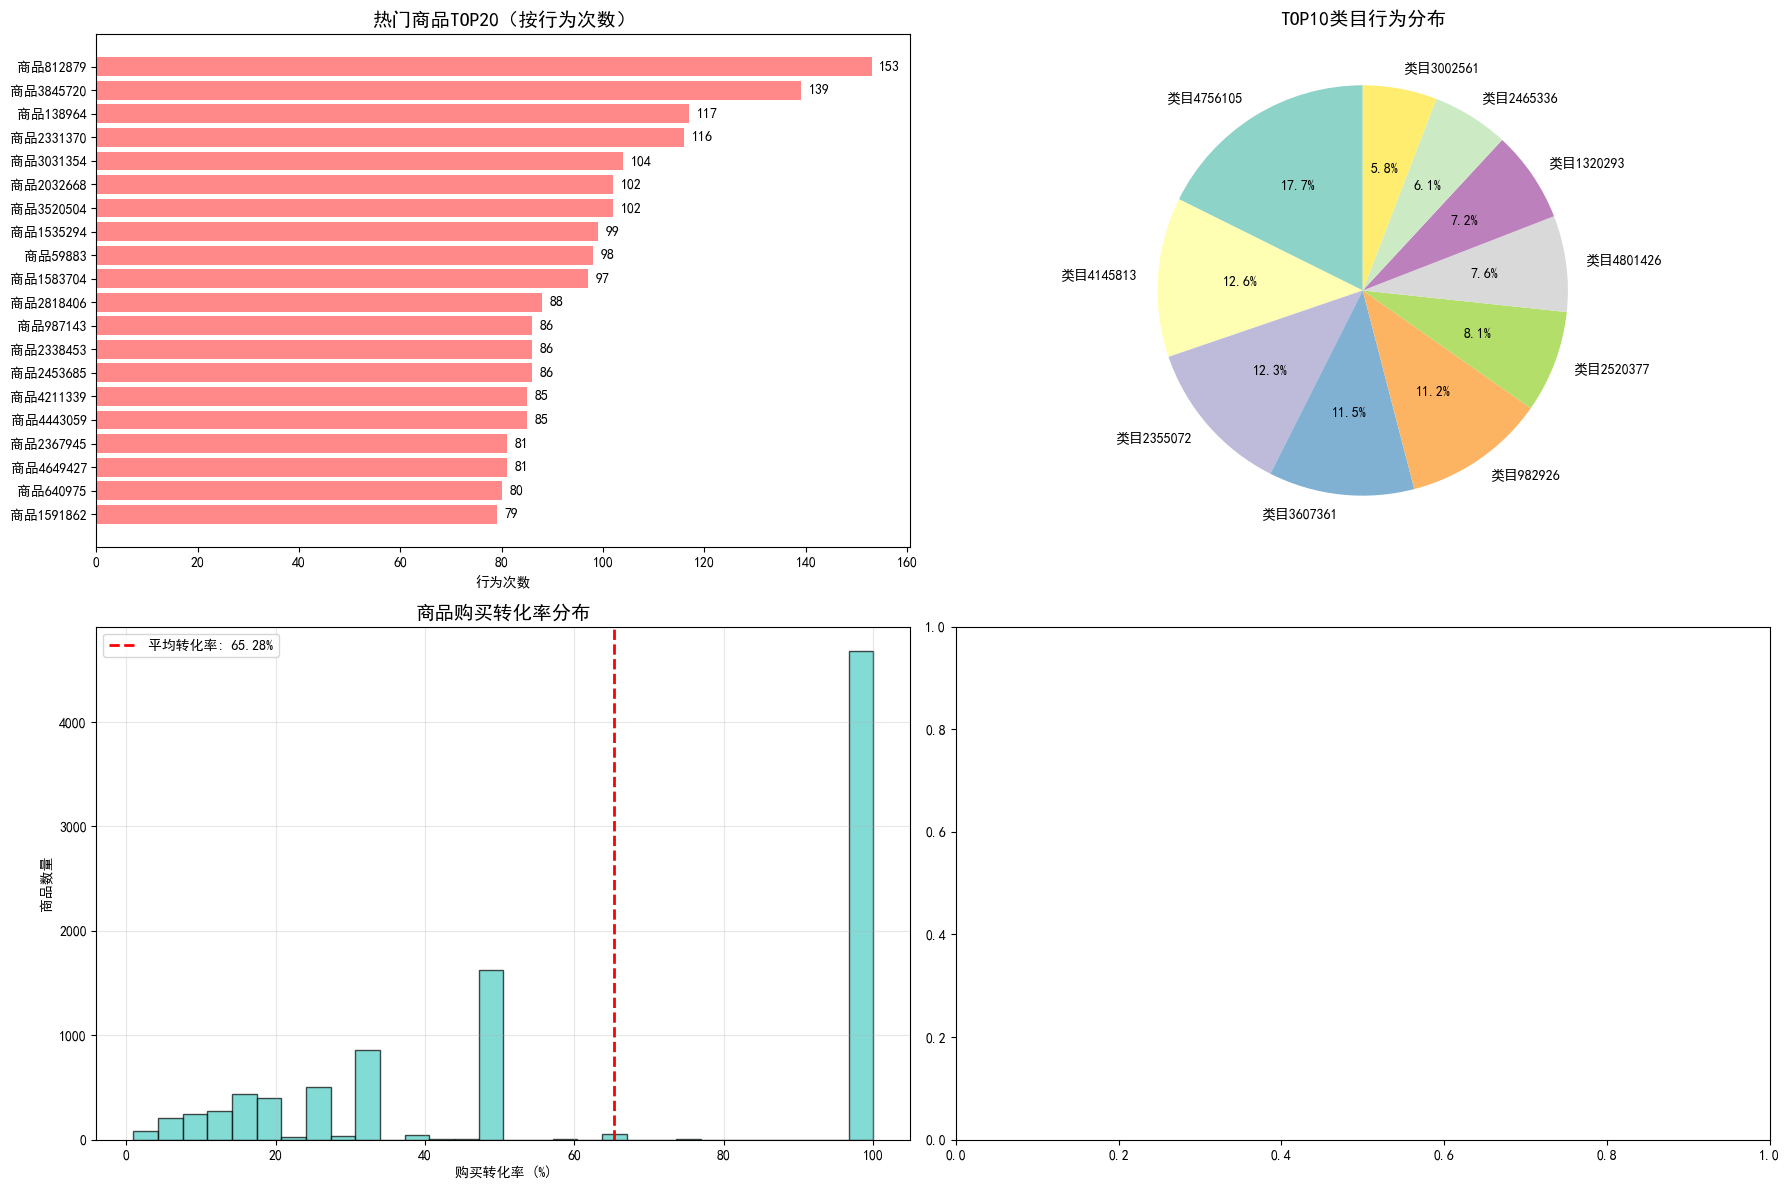

✅ 商品关联分析完成


In [5]:
print("步骤3: 商品关联分析")

# 发现商品关联规则
association_rules = product_analyzer.find_product_associations(df, min_support=0.005)

# 可视化商品分析
product_viz = product_analyzer.create_product_visualization(
    product_stats, category_stats, association_rules
)

print("✅ 商品关联分析完成")

In [6]:
print("步骤4: 构建推荐系统")

# 创建用户-商品矩阵
user_item_matrix = recommender.create_user_item_matrix(data_loader.load_random())

# 计算商品相似度
item_similarity = recommender.calculate_item_similarity()

# 计算用户相似度
user_similarity = recommender.calculate_user_similarity()

print("✅ 推荐系统基础构建完成")

步骤4: 构建推荐系统
正在读取数据...
记录总行数: 100,150,806
数据加载完成:5,001条记录
加载时间:422.19秒
===构建用户_商品矩阵===
用户_商品矩阵形状：(4977, 4921)
稀疏度:99.98%
计算产品相似度...
商品相似度矩阵计算完成
用户相似度矩阵计算完成
✅ 推荐系统基础构建完成


步骤5: 推荐效果测试
推荐覆盖率：0.02% (1/4921商品)
生成推荐演示...
✅ 推荐演示图表已保存至: D:\新建文件夹\电商用户行为分析\reports\figures\recommendation_demo.png


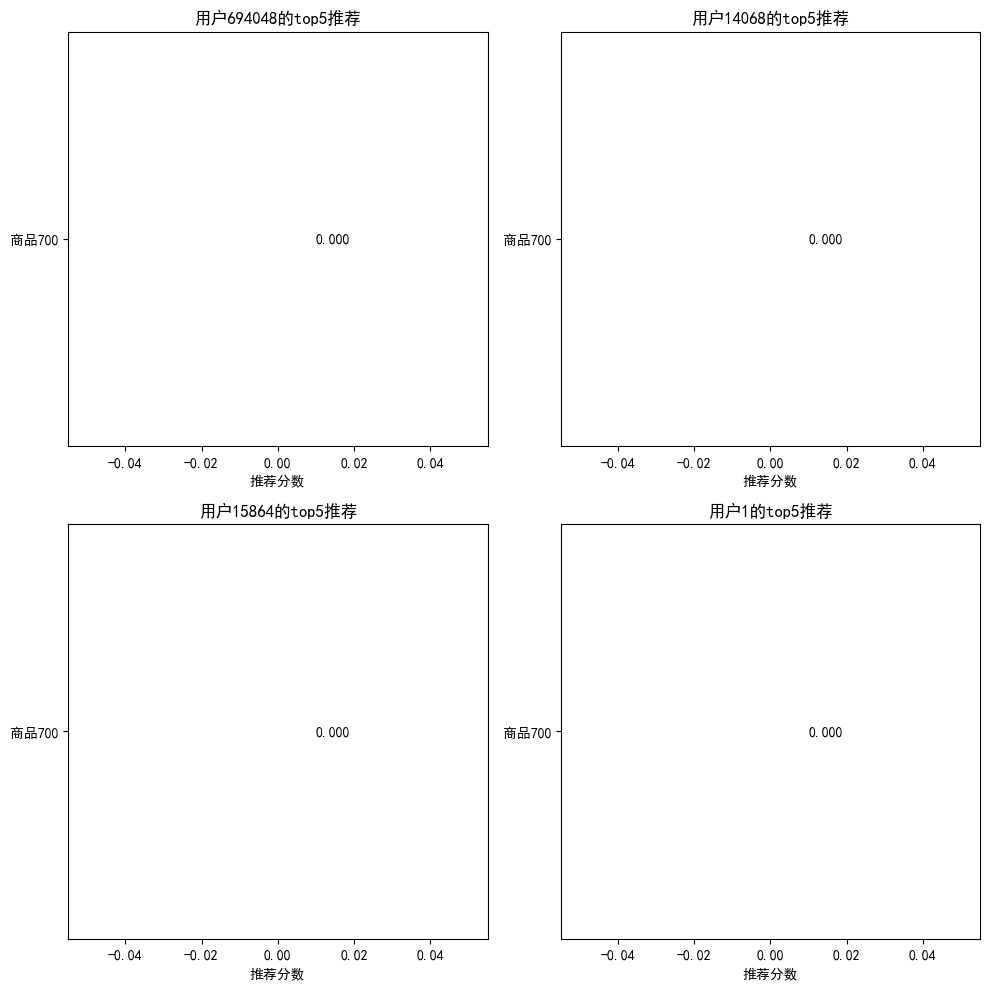


具体用户推荐示例:
用户 655258 的推荐: [700]
用户 356271 的推荐: [700]
用户 563856 的推荐: [700]
✅ 推荐系统测试完成


In [7]:
print("步骤5: 推荐效果测试")

# 评估推荐效果
coverage = recommender.evaluate_recommendation()

# 生成推荐演示
recommendation_demo = recommender.create_recommendation_demo()

# 测试具体用户推荐
test_users = user_item_matrix.sample(3).index
print("\n具体用户推荐示例:")
for user_id in test_users:
    recommendations = recommender.recommend_for_user(user_id, 3, 'item_based')
    if isinstance(recommendations, pd.DataFrame):
        print(f"用户 {user_id} 的推荐: {list(recommendations['商品ID'])}")

print("✅ 推荐系统测试完成")

In [8]:
print("步骤6: 生成商品分析报告")

# 计算关键指标
total_products = len(product_stats)
products_with_purchase = len(product_stats[product_stats['购买次数'] > 0])
avg_conversion = product_stats[product_stats['购买转化率'] > 0]['购买转化率'].mean()
top_category = category_stats.nlargest(1, '总行为数').iloc[0]

report_content = f"""
# 电商商品分析与推荐策略报告

## 商品表现概览

### 1. 商品覆盖度
- 总商品数: {total_products:,}
- 有销售商品: {products_with_purchase:,} ({products_with_purchase/total_products*100:.1f}%)
- 平均购买转化率: {avg_conversion:.2f}%

### 2. 类目表现
- 最热门类目: {category_stats.nlargest(1, '总行为数').index[0]}
- 类目行为数: {top_category['总行为数']:,}
- 类目商品数: {top_category['商品数']:,}
- 类目动销率: {top_category['商品动销率']:.1f}%

### 3. 推荐系统效果
- 用户-商品矩阵: {user_item_matrix.shape[0]:,} 用户 × {user_item_matrix.shape[1]:,} 商品
- 推荐覆盖率: {coverage:.1f}%
- 支持算法: 基于商品的协同过滤 + 基于用户的协同过滤

## 业务洞察与建议

### 商品策略
1. **长尾商品激活**: {total_products - products_with_purchase:,} 个商品无销售，需要促销激活
2. **爆款商品维护**: 维护TOP20热门商品的库存和展示
3. **类目优化**: 加强热门类目的商品丰富度

### 推荐策略
4. **个性化推荐**: 基于用户历史行为提供精准商品推荐
5. **关联销售**: 利用商品关联规则设计捆绑销售策略
6. **新用户引导**: 为新用户提供热门商品和品类推荐

### 运营建议
7. **库存管理**: 基于商品热度预测优化库存分配
8. **营销活动**: 针对低转化高热度商品设计专项营销
9. **用户分层推荐**: 不同价值用户推荐不同价格带商品

## 技术成果
- ✅ 完整的商品热度分析体系
- ✅ 商品关联规则挖掘
- ✅ 协同过滤推荐算法实现
- ✅ 推荐效果评估框架
"""

report_path = PROCESSED_DATA_PATH.parent.parent / "reports" / "analysis_reports" / "商品分析与推荐策略报告.md"
with open(report_path, 'w', encoding='utf-8') as f:
    f.write(report_content)

print(f"✅ 商品分析报告已生成: {report_path}")

步骤6: 生成商品分析报告
✅ 商品分析报告已生成: D:\新建文件夹\电商用户行为分析\reports\analysis_reports\商品分析与推荐策略报告.md
